### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

### Reading the data

In [2]:
df = pd.read_csv('New Data.csv')
df

,Unnamed: 0,Time,Unnamed: 2,AIN_FTM201_PV,AIN_LT01A-%_PV,AIN_LT01B-%_PV,AIN_LT201-%_PV,AIN_LT301-%_PV,AIN_LT401-%_PV,AIN_PT101_PV,...,MSG_ZS_Alrm_49_64,MSG_ZS_Alrm_65_80,MSG_ZS_Alrm_81_96,MSG_ZS_Alrm_97_112,MSG_ZS_Info_01_16,MSG_ZS_Info_17_32,MSG_ZS_Warn_01_16,MSG_ZS_Warn_17_32,MSG_ZS_Warn_33_48,MSG_ZS_Warn_49_64
0,0,NaN,NaN,0.000000,0.042340,0.037764,0.746410,1.397268,100.199707,0.083632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2022-11-30 22:07:34,NaN,NaN,NaN,NaN,NaN,NaN,101.087280,0.083752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2022-11-30 22:07:39,NaN,3624.621338,92.327011,92.327011,50.363960,98.519485,101.175171,0.085486,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2022-11-30 22:07:44,NaN,3726.415771,92.327011,92.327011,50.315800,98.506042,101.174515,0.086038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2022-11-30 22:07:49,NaN,3726.673340,92.327011,92.327011,49.953781,98.505508,101.180038,0.086924,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54898,54898,2022-12-04 02:20:07,NaN,0.000000,0.042340,0.037764,0.775765,1.376651,0.611464,0.087555,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54899,54899,2022-12-04 02:20:12,NaN,0.000000,0.042340,0.037764,0.777751,1.376536,0.611450,0.087462,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54900,54900,2022-12-04 02:20:17,NaN,0.000000,0.042340,0.037764,0.778992,1.376627,0.611443,0.087094,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54901,54901,2022-12-04 02:20:22,NaN,0.000000,0.042340,0.037764,0.778915,1.376519,0.611524,0.086869,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# dropping the nan in the time column

df1 = df[1:]
df1 = df1.reset_index(drop=True)
df1

,Unnamed: 0,Time,Unnamed: 2,AIN_FTM201_PV,AIN_LT01A-%_PV,AIN_LT01B-%_PV,AIN_LT201-%_PV,AIN_LT301-%_PV,AIN_LT401-%_PV,AIN_PT101_PV,...,MSG_ZS_Alrm_49_64,MSG_ZS_Alrm_65_80,MSG_ZS_Alrm_81_96,MSG_ZS_Alrm_97_112,MSG_ZS_Info_01_16,MSG_ZS_Info_17_32,MSG_ZS_Warn_01_16,MSG_ZS_Warn_17_32,MSG_ZS_Warn_33_48,MSG_ZS_Warn_49_64
0,1,2022-11-30 22:07:34,NaN,NaN,NaN,NaN,NaN,NaN,101.087280,0.083752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2022-11-30 22:07:39,NaN,3624.621338,92.327011,92.327011,50.363960,98.519485,101.175171,0.085486,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2022-11-30 22:07:44,NaN,3726.415771,92.327011,92.327011,50.315800,98.506042,101.174515,0.086038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2022-11-30 22:07:49,NaN,3726.673340,92.327011,92.327011,49.953781,98.505508,101.180038,0.086924,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2022-11-30 22:07:54,NaN,3834.568359,92.327011,92.327011,50.040565,98.511604,101.174377,0.085866,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54897,54898,2022-12-04 02:20:07,NaN,0.000000,0.042340,0.037764,0.775765,1.376651,0.611464,0.087555,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54898,54899,2022-12-04 02:20:12,NaN,0.000000,0.042340,0.037764,0.777751,1.376536,0.611450,0.087462,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54899,54900,2022-12-04 02:20:17,NaN,0.000000,0.042340,0.037764,0.778992,1.376627,0.611443,0.087094,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54900,54901,2022-12-04 02:20:22,NaN,0.000000,0.042340,0.037764,0.778915,1.376519,0.611524,0.086869,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Dropping the unnamed columns
df2 = df1.drop(['Unnamed: 0', 'Unnamed: 2'], axis=1)
df2

,Time,AIN_FTM201_PV,AIN_LT01A-%_PV,AIN_LT01B-%_PV,AIN_LT201-%_PV,AIN_LT301-%_PV,AIN_LT401-%_PV,AIN_PT101_PV,AIN_PT102_PV,AIN_PT201_PV,...,MSG_ZS_Alrm_49_64,MSG_ZS_Alrm_65_80,MSG_ZS_Alrm_81_96,MSG_ZS_Alrm_97_112,MSG_ZS_Info_01_16,MSG_ZS_Info_17_32,MSG_ZS_Warn_01_16,MSG_ZS_Warn_17_32,MSG_ZS_Warn_33_48,MSG_ZS_Warn_49_64
0,2022-11-30 22:07:34,NaN,NaN,NaN,NaN,NaN,101.087280,0.083752,NaN,0.148267,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-11-30 22:07:39,3624.621338,92.327011,92.327011,50.363960,98.519485,101.175171,0.085486,0.027548,0.706005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-11-30 22:07:44,3726.415771,92.327011,92.327011,50.315800,98.506042,101.174515,0.086038,0.027681,0.711375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-11-30 22:07:49,3726.673340,92.327011,92.327011,49.953781,98.505508,101.180038,0.086924,0.027188,0.712503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-11-30 22:07:54,3834.568359,92.327011,92.327011,50.040565,98.511604,101.174377,0.085866,0.027598,0.709258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54897,2022-12-04 02:20:07,0.000000,0.042340,0.037764,0.775765,1.376651,0.611464,0.087555,0.043073,0.160203,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54898,2022-12-04 02:20:12,0.000000,0.042340,0.037764,0.777751,1.376536,0.611450,0.087462,0.042893,0.161098,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54899,2022-12-04 02:20:17,0.000000,0.042340,0.037764,0.778992,1.376627,0.611443,0.087094,0.043134,0.160196,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54900,2022-12-04 02:20:22,0.000000,0.042340,0.037764,0.778915,1.376519,0.611524,0.086869,0.042719,0.160183,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Filling nan in the middle using interpolation in the backward direction

df3 = df2.interpolate(method ='linear', limit_direction ='backward')
df3

,Time,AIN_FTM201_PV,AIN_LT01A-%_PV,AIN_LT01B-%_PV,AIN_LT201-%_PV,AIN_LT301-%_PV,AIN_LT401-%_PV,AIN_PT101_PV,AIN_PT102_PV,AIN_PT201_PV,...,MSG_ZS_Alrm_49_64,MSG_ZS_Alrm_65_80,MSG_ZS_Alrm_81_96,MSG_ZS_Alrm_97_112,MSG_ZS_Info_01_16,MSG_ZS_Info_17_32,MSG_ZS_Warn_01_16,MSG_ZS_Warn_17_32,MSG_ZS_Warn_33_48,MSG_ZS_Warn_49_64
0,2022-11-30 22:07:34,3624.621338,92.327011,92.327011,50.363960,98.519485,101.087280,0.083752,0.027548,0.148267,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-11-30 22:07:39,3624.621338,92.327011,92.327011,50.363960,98.519485,101.175171,0.085486,0.027548,0.706005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-11-30 22:07:44,3726.415771,92.327011,92.327011,50.315800,98.506042,101.174515,0.086038,0.027681,0.711375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-11-30 22:07:49,3726.673340,92.327011,92.327011,49.953781,98.505508,101.180038,0.086924,0.027188,0.712503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-11-30 22:07:54,3834.568359,92.327011,92.327011,50.040565,98.511604,101.174377,0.085866,0.027598,0.709258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54897,2022-12-04 02:20:07,0.000000,0.042340,0.037764,0.775765,1.376651,0.611464,0.087555,0.043073,0.160203,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54898,2022-12-04 02:20:12,0.000000,0.042340,0.037764,0.777751,1.376536,0.611450,0.087462,0.042893,0.161098,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54899,2022-12-04 02:20:17,0.000000,0.042340,0.037764,0.778992,1.376627,0.611443,0.087094,0.043134,0.160196,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54900,2022-12-04 02:20:22,0.000000,0.042340,0.037764,0.778915,1.376519,0.611524,0.086869,0.042719,0.160183,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# making sure the time column is in the recognised format

df3['Time'] = pd.to_datetime(df3['Time'], infer_datetime_format=True)
df3

,Time,AIN_FTM201_PV,AIN_LT01A-%_PV,AIN_LT01B-%_PV,AIN_LT201-%_PV,AIN_LT301-%_PV,AIN_LT401-%_PV,AIN_PT101_PV,AIN_PT102_PV,AIN_PT201_PV,...,MSG_ZS_Alrm_49_64,MSG_ZS_Alrm_65_80,MSG_ZS_Alrm_81_96,MSG_ZS_Alrm_97_112,MSG_ZS_Info_01_16,MSG_ZS_Info_17_32,MSG_ZS_Warn_01_16,MSG_ZS_Warn_17_32,MSG_ZS_Warn_33_48,MSG_ZS_Warn_49_64
0,2022-11-30 22:07:34,3624.621338,92.327011,92.327011,50.363960,98.519485,101.087280,0.083752,0.027548,0.148267,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-11-30 22:07:39,3624.621338,92.327011,92.327011,50.363960,98.519485,101.175171,0.085486,0.027548,0.706005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-11-30 22:07:44,3726.415771,92.327011,92.327011,50.315800,98.506042,101.174515,0.086038,0.027681,0.711375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-11-30 22:07:49,3726.673340,92.327011,92.327011,49.953781,98.505508,101.180038,0.086924,0.027188,0.712503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-11-30 22:07:54,3834.568359,92.327011,92.327011,50.040565,98.511604,101.174377,0.085866,0.027598,0.709258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54897,2022-12-04 02:20:07,0.000000,0.042340,0.037764,0.775765,1.376651,0.611464,0.087555,0.043073,0.160203,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54898,2022-12-04 02:20:12,0.000000,0.042340,0.037764,0.777751,1.376536,0.611450,0.087462,0.042893,0.161098,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54899,2022-12-04 02:20:17,0.000000,0.042340,0.037764,0.778992,1.376627,0.611443,0.087094,0.043134,0.160196,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54900,2022-12-04 02:20:22,0.000000,0.042340,0.037764,0.778915,1.376519,0.611524,0.086869,0.042719,0.160183,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Setting the time column as index
df3.index = df3['Time']
df3

,Time,AIN_FTM201_PV,AIN_LT01A-%_PV,AIN_LT01B-%_PV,AIN_LT201-%_PV,AIN_LT301-%_PV,AIN_LT401-%_PV,AIN_PT101_PV,AIN_PT102_PV,AIN_PT201_PV,...,MSG_ZS_Alrm_49_64,MSG_ZS_Alrm_65_80,MSG_ZS_Alrm_81_96,MSG_ZS_Alrm_97_112,MSG_ZS_Info_01_16,MSG_ZS_Info_17_32,MSG_ZS_Warn_01_16,MSG_ZS_Warn_17_32,MSG_ZS_Warn_33_48,MSG_ZS_Warn_49_64
Time,,,,,,,,,,,,,,,,,,,,,
2022-11-30 22:07:34,2022-11-30 22:07:34,3624.621338,92.327011,92.327011,50.363960,98.519485,101.087280,0.083752,0.027548,0.148267,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-30 22:07:39,2022-11-30 22:07:39,3624.621338,92.327011,92.327011,50.363960,98.519485,101.175171,0.085486,0.027548,0.706005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-30 22:07:44,2022-11-30 22:07:44,3726.415771,92.327011,92.327011,50.315800,98.506042,101.174515,0.086038,0.027681,0.711375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-30 22:07:49,2022-11-30 22:07:49,3726.673340,92.327011,92.327011,49.953781,98.505508,101.180038,0.086924,0.027188,0.712503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-30 22:07:54,2022-11-30 22:07:54,3834.568359,92.327011,92.327011,50.040565,98.511604,101.174377,0.085866,0.027598,0.709258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-04 02:20:07,2022-12-04 02:20:07,0.000000,0.042340,0.037764,0.775765,1.376651,0.611464,0.087555,0.043073,0.160203,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-04 02:20:12,2022-12-04 02:20:12,0.000000,0.042340,0.037764,0.777751,1.376536,0.611450,0.087462,0.042893,0.161098,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-04 02:20:17,2022-12-04 02:20:17,0.000000,0.042340,0.037764,0.778992,1.376627,0.611443,0.087094,0.043134,0.160196,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# dropping the time column
df4 = df3.drop('Time', axis=1)
df4

,AIN_FTM201_PV,AIN_LT01A-%_PV,AIN_LT01B-%_PV,AIN_LT201-%_PV,AIN_LT301-%_PV,AIN_LT401-%_PV,AIN_PT101_PV,AIN_PT102_PV,AIN_PT201_PV,AIN_PT202_PV,...,MSG_ZS_Alrm_49_64,MSG_ZS_Alrm_65_80,MSG_ZS_Alrm_81_96,MSG_ZS_Alrm_97_112,MSG_ZS_Info_01_16,MSG_ZS_Info_17_32,MSG_ZS_Warn_01_16,MSG_ZS_Warn_17_32,MSG_ZS_Warn_33_48,MSG_ZS_Warn_49_64
Time,,,,,,,,,,,,,,,,,,,,,
2022-11-30 22:07:34,3624.621338,92.327011,92.327011,50.363960,98.519485,101.087280,0.083752,0.027548,0.148267,0.167653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-30 22:07:39,3624.621338,92.327011,92.327011,50.363960,98.519485,101.175171,0.085486,0.027548,0.706005,1.562975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-30 22:07:44,3726.415771,92.327011,92.327011,50.315800,98.506042,101.174515,0.086038,0.027681,0.711375,1.563163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-30 22:07:49,3726.673340,92.327011,92.327011,49.953781,98.505508,101.180038,0.086924,0.027188,0.712503,1.563681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-30 22:07:54,3834.568359,92.327011,92.327011,50.040565,98.511604,101.174377,0.085866,0.027598,0.709258,1.563485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-04 02:20:07,0.000000,0.042340,0.037764,0.775765,1.376651,0.611464,0.087555,0.043073,0.160203,0.171718,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-04 02:20:12,0.000000,0.042340,0.037764,0.777751,1.376536,0.611450,0.087462,0.042893,0.161098,0.171721,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-04 02:20:17,0.000000,0.042340,0.037764,0.778992,1.376627,0.611443,0.087094,0.043134,0.160196,0.171646,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(df4)

In [10]:
df5 = pd.DataFrame(imputed, index=df4.index, columns=df4.columns)

In [11]:
df5

,AIN_FTM201_PV,AIN_LT01A-%_PV,AIN_LT01B-%_PV,AIN_LT201-%_PV,AIN_LT301-%_PV,AIN_LT401-%_PV,AIN_PT101_PV,AIN_PT102_PV,AIN_PT201_PV,AIN_PT202_PV,...,MSG_ZS_Alrm_49_64,MSG_ZS_Alrm_65_80,MSG_ZS_Alrm_81_96,MSG_ZS_Alrm_97_112,MSG_ZS_Info_01_16,MSG_ZS_Info_17_32,MSG_ZS_Warn_01_16,MSG_ZS_Warn_17_32,MSG_ZS_Warn_33_48,MSG_ZS_Warn_49_64
Time,,,,,,,,,,,,,,,,,,,,,
2022-11-30 22:07:34,3624.621338,92.327011,92.327011,50.363960,98.519485,101.087280,0.083752,0.027548,0.148267,0.167653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-30 22:07:39,3624.621338,92.327011,92.327011,50.363960,98.519485,101.175171,0.085486,0.027548,0.706005,1.562975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-30 22:07:44,3726.415771,92.327011,92.327011,50.315800,98.506042,101.174515,0.086038,0.027681,0.711375,1.563163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-30 22:07:49,3726.673340,92.327011,92.327011,49.953781,98.505508,101.180038,0.086924,0.027188,0.712503,1.563681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-30 22:07:54,3834.568359,92.327011,92.327011,50.040565,98.511604,101.174377,0.085866,0.027598,0.709258,1.563485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-04 02:20:07,0.000000,0.042340,0.037764,0.775765,1.376651,0.611464,0.087555,0.043073,0.160203,0.171718,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-04 02:20:12,0.000000,0.042340,0.037764,0.777751,1.376536,0.611450,0.087462,0.042893,0.161098,0.171721,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-04 02:20:17,0.000000,0.042340,0.037764,0.778992,1.376627,0.611443,0.087094,0.043134,0.160196,0.171646,...,0.0,2048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# getting the same columns that was used on the previous dataset

prev_df = pd.read_csv('Final 2.csv')
prev_df

,S.No.,"""Time_ms""",AIN_FTM201_PV,AIN_LT01A-%_PV,AIN_LT201-%_PV,AIN_LT301-%_PV,AIN_LT401-%_PV,AIN_PT101_PV,AIN_PT102_PV,AIN_PT201_PV,AIN_PT202_PV,AIN_TT01-A1_PV,AIN_TT02_PV,AIN_TT101_PV,AIN_TT201_PV,MSG_ZS_Warn_01_16,MSG_SVC_Alrm_81_96
0,1,44843924400,0.000000,0.039300,0.755485,1.294017,0.608534,0.011635,0.027600,0.123924,0.481143,23.950130,22.360058,22.481747,22.724154,0,0
1,3,44843924458,0.000000,0.039300,0.756606,1.293281,0.608522,0.009960,0.028700,0.123844,0.481351,23.951006,22.360058,22.507984,22.723972,0,0
2,5,44843924516,0.000000,0.039300,0.758616,1.291147,0.608532,0.010300,0.027815,0.123959,0.480798,23.950705,22.360058,22.528824,22.725214,0,0
3,6,44843924574,0.000000,0.039300,0.757443,1.293479,0.608453,0.011200,0.028306,0.124720,0.480772,23.950115,22.360058,22.541317,22.722551,0,0
4,8,44843924632,0.000000,0.039300,0.758061,1.292186,0.608491,0.010332,0.028400,0.124437,0.480754,23.950062,22.360058,22.535053,22.721098,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35856,60182,44845999741,2934.407715,78.990707,56.381874,34.240925,46.462570,0.029400,0.020300,0.775146,1.565473,79.148293,77.596375,24.941082,93.973465,0,0
35857,60184,44845999799,3020.947266,78.990707,56.836926,34.259140,46.462536,0.029100,0.019100,0.782553,1.566176,79.178436,77.575485,24.956272,94.128319,0,0
35858,60186,44845999857,3091.956787,78.990707,56.758358,34.272942,46.462273,0.024100,0.019900,0.784331,1.566044,79.181198,77.552902,24.996477,94.152382,0,0
35859,60187,44845999915,2952.441650,78.990707,56.602180,34.265793,46.463074,0.026200,0.020541,0.773672,1.567114,79.151558,77.531258,25.008638,94.315872,0,0


In [13]:
prev_df.columns

Index(['S.No.', '"Time_ms"', 'AIN_FTM201_PV', 'AIN_LT01A-%_PV',
       'AIN_LT201-%_PV', 'AIN_LT301-%_PV', 'AIN_LT401-%_PV', 'AIN_PT101_PV',
       'AIN_PT102_PV', 'AIN_PT201_PV', 'AIN_PT202_PV', 'AIN_TT01-A1_PV',
       'AIN_TT02_PV', 'AIN_TT101_PV', 'AIN_TT201_PV', 'MSG_ZS_Warn_01_16',
       'MSG_SVC_Alrm_81_96'],
      dtype='object')

In [14]:
ref = ['AIN_FTM201_PV', 'AIN_LT01A-%_PV',
       'AIN_LT201-%_PV', 'AIN_LT301-%_PV', 'AIN_LT401-%_PV', 'AIN_PT101_PV',
       'AIN_PT102_PV', 'AIN_PT201_PV', 'AIN_PT202_PV', 'AIN_TT01-A1_PV',
       'AIN_TT02_PV', 'AIN_TT101_PV', 'AIN_TT201_PV', 'MSG_ZS_Warn_01_16',
       'MSG_SVC_Alrm_81_96']
print(ref)

['AIN_FTM201_PV', 'AIN_LT01A-%_PV', 'AIN_LT201-%_PV', 'AIN_LT301-%_PV', 'AIN_LT401-%_PV', 'AIN_PT101_PV', 'AIN_PT102_PV', 'AIN_PT201_PV', 'AIN_PT202_PV', 'AIN_TT01-A1_PV', 'AIN_TT02_PV', 'AIN_TT101_PV', 'AIN_TT201_PV', 'MSG_ZS_Warn_01_16', 'MSG_SVC_Alrm_81_96']


In [15]:
sel_df = df5[ref]
sel_df

,AIN_FTM201_PV,AIN_LT01A-%_PV,AIN_LT201-%_PV,AIN_LT301-%_PV,AIN_LT401-%_PV,AIN_PT101_PV,AIN_PT102_PV,AIN_PT201_PV,AIN_PT202_PV,AIN_TT01-A1_PV,AIN_TT02_PV,AIN_TT101_PV,AIN_TT201_PV,MSG_ZS_Warn_01_16,MSG_SVC_Alrm_81_96
Time,,,,,,,,,,,,,,,
2022-11-30 22:07:34,3624.621338,92.327011,50.363960,98.519485,101.087280,0.083752,0.027548,0.148267,0.167653,81.839806,81.369545,19.020504,88.046585,0.0,4.0
2022-11-30 22:07:39,3624.621338,92.327011,50.363960,98.519485,101.175171,0.085486,0.027548,0.706005,1.562975,81.839806,81.369545,21.075260,88.046585,0.0,4.0
2022-11-30 22:07:44,3726.415771,92.327011,50.315800,98.506042,101.174515,0.086038,0.027681,0.711375,1.563163,81.824516,81.347824,21.065081,88.091934,0.0,4.0
2022-11-30 22:07:49,3726.673340,92.327011,49.953781,98.505508,101.180038,0.086924,0.027188,0.712503,1.563681,81.793839,81.325745,21.108761,88.074165,0.0,4.0
2022-11-30 22:07:54,3834.568359,92.327011,50.040565,98.511604,101.174377,0.085866,0.027598,0.709258,1.563485,81.793167,81.302414,21.128408,88.089851,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-04 02:20:07,0.000000,0.042340,0.775765,1.376651,0.611464,0.087555,0.043073,0.160203,0.171718,22.351879,18.461653,18.518061,19.027262,0.0,0.0
2022-12-04 02:20:12,0.000000,0.042340,0.777751,1.376536,0.611450,0.087462,0.042893,0.161098,0.171721,22.351233,18.461863,18.449636,19.027952,0.0,0.0
2022-12-04 02:20:17,0.000000,0.042340,0.778992,1.376627,0.611443,0.087094,0.043134,0.160196,0.171646,22.358873,18.460545,18.401417,19.025520,0.0,0.0


In [16]:
# Considering the fact that we only deal with each secinds interval in pycaret models, it's best to reconstrtuct the datatset for a second interval

sel_df = sel_df.asfreq('5s')
sel_df

,AIN_FTM201_PV,AIN_LT01A-%_PV,AIN_LT201-%_PV,AIN_LT301-%_PV,AIN_LT401-%_PV,AIN_PT101_PV,AIN_PT102_PV,AIN_PT201_PV,AIN_PT202_PV,AIN_TT01-A1_PV,AIN_TT02_PV,AIN_TT101_PV,AIN_TT201_PV,MSG_ZS_Warn_01_16,MSG_SVC_Alrm_81_96
Time,,,,,,,,,,,,,,,
2022-11-30 22:07:34,3624.621338,92.327011,50.363960,98.519485,101.087280,0.083752,0.027548,0.148267,0.167653,81.839806,81.369545,19.020504,88.046585,0.0,4.0
2022-11-30 22:07:39,3624.621338,92.327011,50.363960,98.519485,101.175171,0.085486,0.027548,0.706005,1.562975,81.839806,81.369545,21.075260,88.046585,0.0,4.0
2022-11-30 22:07:44,3726.415771,92.327011,50.315800,98.506042,101.174515,0.086038,0.027681,0.711375,1.563163,81.824516,81.347824,21.065081,88.091934,0.0,4.0
2022-11-30 22:07:49,3726.673340,92.327011,49.953781,98.505508,101.180038,0.086924,0.027188,0.712503,1.563681,81.793839,81.325745,21.108761,88.074165,0.0,4.0
2022-11-30 22:07:54,3834.568359,92.327011,50.040565,98.511604,101.174377,0.085866,0.027598,0.709258,1.563485,81.793167,81.302414,21.128408,88.089851,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-04 02:20:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-04 02:20:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-04 02:20:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Filing the NaN values with interpolation

sel_df = sel_df.interpolate(method ='linear', limit_direction ='forward')
sel_df

,AIN_FTM201_PV,AIN_LT01A-%_PV,AIN_LT201-%_PV,AIN_LT301-%_PV,AIN_LT401-%_PV,AIN_PT101_PV,AIN_PT102_PV,AIN_PT201_PV,AIN_PT202_PV,AIN_TT01-A1_PV,AIN_TT02_PV,AIN_TT101_PV,AIN_TT201_PV,MSG_ZS_Warn_01_16,MSG_SVC_Alrm_81_96
Time,,,,,,,,,,,,,,,
2022-11-30 22:07:34,3624.621338,92.327011,50.363960,98.519485,101.087280,0.083752,0.027548,0.148267,0.167653,81.839806,81.369545,19.020504,88.046585,0.0,4.0
2022-11-30 22:07:39,3624.621338,92.327011,50.363960,98.519485,101.175171,0.085486,0.027548,0.706005,1.562975,81.839806,81.369545,21.075260,88.046585,0.0,4.0
2022-11-30 22:07:44,3726.415771,92.327011,50.315800,98.506042,101.174515,0.086038,0.027681,0.711375,1.563163,81.824516,81.347824,21.065081,88.091934,0.0,4.0
2022-11-30 22:07:49,3726.673340,92.327011,49.953781,98.505508,101.180038,0.086924,0.027188,0.712503,1.563681,81.793839,81.325745,21.108761,88.074165,0.0,4.0
2022-11-30 22:07:54,3834.568359,92.327011,50.040565,98.511604,101.174377,0.085866,0.027598,0.709258,1.563485,81.793167,81.302414,21.128408,88.089851,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-04 02:20:04,0.000000,0.042340,0.760996,1.389148,0.615760,0.085557,0.039407,0.156965,0.169572,24.029987,19.190037,19.201794,20.488276,0.0,0.0
2022-12-04 02:20:09,0.000000,0.042340,0.760996,1.389148,0.615760,0.085557,0.039407,0.156965,0.169572,24.029987,19.190037,19.201794,20.488276,0.0,0.0
2022-12-04 02:20:14,0.000000,0.042340,0.760996,1.389148,0.615760,0.085557,0.039407,0.156965,0.169572,24.029987,19.190037,19.201794,20.488276,0.0,0.0


In [18]:
sel_df.isna().sum()

AIN_FTM201_PV         0
AIN_LT01A-%_PV        0
AIN_LT201-%_PV        0
AIN_LT301-%_PV        0
AIN_LT401-%_PV        0
AIN_PT101_PV          0
AIN_PT102_PV          0
AIN_PT201_PV          0
AIN_PT202_PV          0
AIN_TT01-A1_PV        0
AIN_TT02_PV           0
AIN_TT101_PV          0
AIN_TT201_PV          0
MSG_ZS_Warn_01_16     0
MSG_SVC_Alrm_81_96    0
dtype: int64

In [19]:
# Selecting the first column
df_1 = sel_df[['AIN_FTM201_PV']]
df_1

,AIN_FTM201_PV
Time,
2022-11-30 22:07:34,3624.621338
2022-11-30 22:07:39,3624.621338
2022-11-30 22:07:44,3726.415771
2022-11-30 22:07:49,3726.673340
2022-11-30 22:07:54,3834.568359
...,...
2022-12-04 02:20:04,0.000000
2022-12-04 02:20:09,0.000000
2022-12-04 02:20:14,0.000000


<AxesSubplot:>

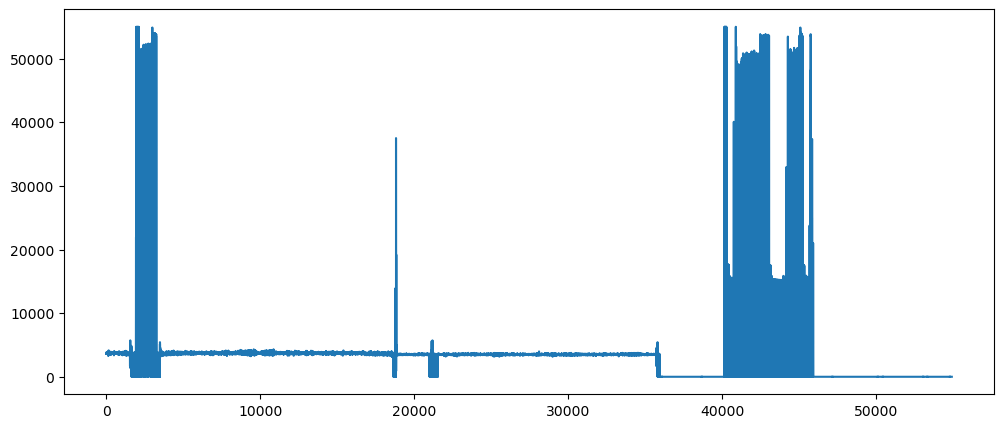

In [20]:
df1['AIN_FTM201_PV'].plot(figsize=(12, 5))

In [21]:
# Pycaret model

from pycaret.time_series import TSForecastingExperiment
from pycaret.time_series import *

In [22]:
# Setting up the selected column for use.
exp1 = TSForecastingExperiment()
exp1.setup(data=df_1, target='AIN_FTM201_PV', scale_target="minmax",
          fh=7200, session_id=123, fig_kwargs = {"template": "simple_white","hoverinfo":"none"})

,Description,Value
0,session_id,123
1,Target,AIN_FTM201_PV
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(54875, 1)"
5,Transformed data shape,"(54875, 1)"
6,Transformed train set shape,"(47675, 1)"
7,Transformed test set shape,"(7200, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [23]:
# Checking the possible models
exp1.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
croston,Croston,sktime.forecasting.croston.Croston,True
ets,ETS,sktime.forecasting.ets.AutoETS,True


In [24]:
# Blending and tuning the selected models

naive = exp1.create_model('naive')
final = exp1.finalize_model(naive)
exp1.save_model(final, 'first_model')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-12-02 10:20:24,14.2329,7.7696,233.7772,374.9052,0.0824,0.0741,-0.4777
1,2022-12-02 20:20:24,813.7120,408.9547,13537.7723,18962.2975,1279272301976410624.0000,1.1686,-0.8133
2,2022-12-03 06:20:24,60.8201,5.9302,13362.2683,14190.2987,47253220748736765952.0000,1.5659,-7.8262
Mean,NaT,296.2550,140.8848,9044.6059,11175.8338,16177497683571058688.0000,0.9362,-3.0391
SD,NaT,366.3913,189.5555,6230.6087,7881.9641,21980060015429210112.0000,0.6308,3.3878


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                 TransformerPipeline(steps=[('scaler',
                                                                                             TabularToSeriesAdaptor(transformer=MinMaxScaler()))])),
                                                                ('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                                                                                 TransformerPipeline(steps=[('scaler',
                                                                                                                       

In [25]:
# Loading the trained model
model1 = load_model('first_model')

# making prediction for a day reading
pred1 = predict_model(model1, fh=3600)
pred1

Transformation Pipeline and Model Successfully Loaded


,y_pred
2022-12-04 02:20:29,0.0
2022-12-04 02:20:34,0.0
2022-12-04 02:20:39,0.0
2022-12-04 02:20:44,0.0
2022-12-04 02:20:49,0.0
...,...
2022-12-04 07:20:04,0.0
2022-12-04 07:20:09,0.0
2022-12-04 07:20:14,0.0
2022-12-04 07:20:19,0.0


In [26]:
# Looking at the model performance, the best model is Naive 

In [27]:
# Selecting the second column
df_2 = sel_df[['AIN_LT01A-%_PV']]
df_2

,AIN_LT01A-%_PV
Time,
2022-11-30 22:07:34,92.327011
2022-11-30 22:07:39,92.327011
2022-11-30 22:07:44,92.327011
2022-11-30 22:07:49,92.327011
2022-11-30 22:07:54,92.327011
...,...
2022-12-04 02:20:04,0.042340
2022-12-04 02:20:09,0.042340
2022-12-04 02:20:14,0.042340


<AxesSubplot:xlabel='Time'>

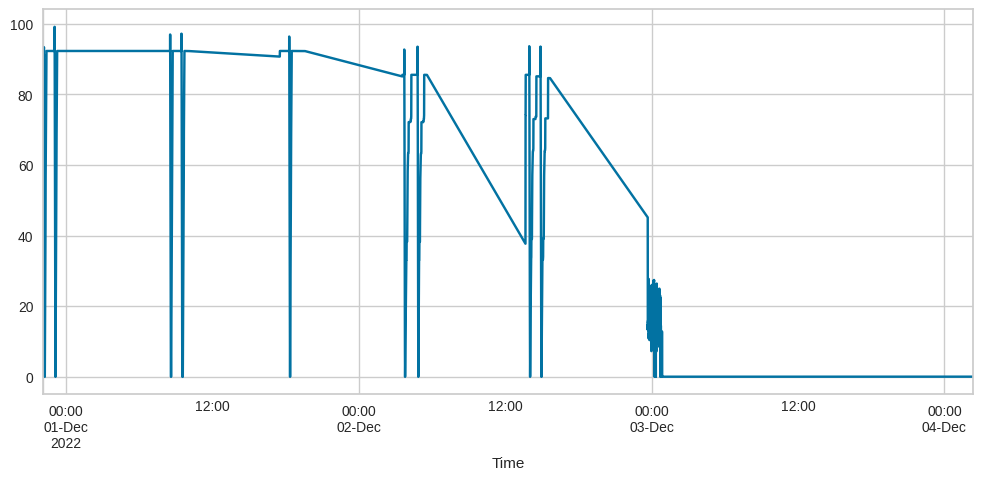

In [28]:
df_2['AIN_LT01A-%_PV'].plot(figsize=(12, 5))

In [29]:
exp2 = TSForecastingExperiment()
exp2.setup(data=df_2, target='AIN_LT01A-%_PV', scale_target="minmax",
          fh=5000, session_id=123, fig_kwargs = {"template": "simple_white","hoverinfo":"none"})

,Description,Value
0,session_id,123
1,Target,AIN_LT01A-%_PV
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(54875, 1)"
5,Transformed data shape,"(54875, 1)"
6,Transformed train set shape,"(49875, 1)"
7,Transformed test set shape,"(5000, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [30]:
# Blending and tuning the selected models

naive = exp2.create_model('naive')
final = exp2.finalize_model(naive)
exp2.save_model(final, 'second_model')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-12-02 22:33:44,192.9431,36.1628,40.4552,44.1643,1773.4373,1.5404,-5.2146
1,2022-12-03 05:30:24,0.0142,0.0029,0.0037,0.0041,0.0891,0.0942,-4.2426
2,2022-12-03 12:27:04,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
Mean,NaT,64.3191,12.0552,13.4863,14.7228,591.1755,0.5449,-2.8191
SD,NaT,90.9509,17.0466,19.0699,20.8183,835.9854,0.7050,2.7295


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                 TransformerPipeline(steps=[('scaler',
                                                                                             TabularToSeriesAdaptor(transformer=MinMaxScaler()))])),
                                                                ('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                                                                                 TransformerPipeline(steps=[('scaler',
                                                                                                                       

In [31]:
# Loading the trained model
model2 = load_model('second_model')

# making prediction for a day reading
pred2 = predict_model(model2, fh=3600)
pred2

Transformation Pipeline and Model Successfully Loaded


,y_pred
2022-12-04 02:20:29,4.1989
2022-12-04 02:20:34,4.1989
2022-12-04 02:20:39,4.1989
2022-12-04 02:20:44,4.1989
2022-12-04 02:20:49,4.1989
...,...
2022-12-04 07:20:04,4.1989
2022-12-04 07:20:09,4.1989
2022-12-04 07:20:14,4.1989
2022-12-04 07:20:19,4.1989


In [32]:
# Selecting the third column
df_3 = sel_df[['AIN_LT201-%_PV']]
df_3

,AIN_LT201-%_PV
Time,
2022-11-30 22:07:34,50.363960
2022-11-30 22:07:39,50.363960
2022-11-30 22:07:44,50.315800
2022-11-30 22:07:49,49.953781
2022-11-30 22:07:54,50.040565
...,...
2022-12-04 02:20:04,0.760996
2022-12-04 02:20:09,0.760996
2022-12-04 02:20:14,0.760996


<AxesSubplot:xlabel='Time'>

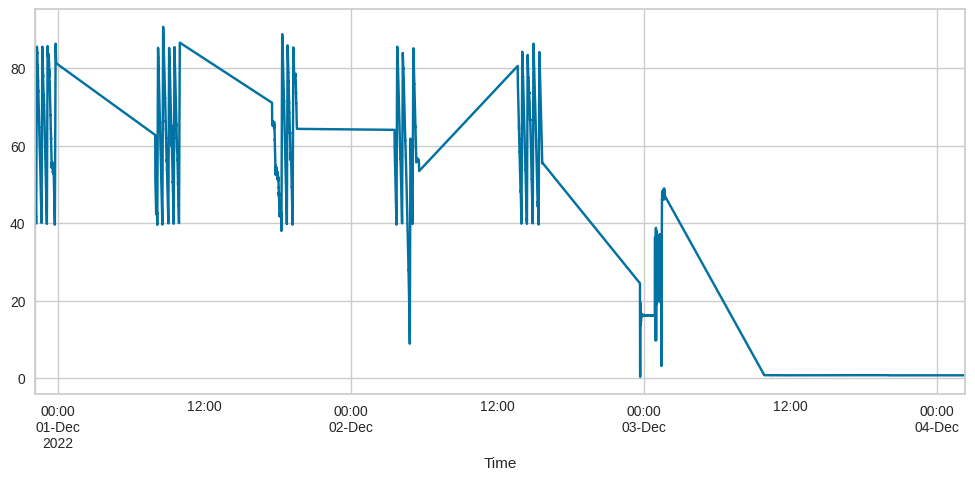

In [33]:
df_3['AIN_LT201-%_PV'].plot(figsize=(12, 5))

In [34]:
exp3 = TSForecastingExperiment()
exp3.setup(data=df_3, target='AIN_LT201-%_PV', scale_target="minmax",
          fh=5000, session_id=123, fig_kwargs = {"template": "simple_white","hoverinfo":"none"})

,Description,Value
0,session_id,123
1,Target,AIN_LT201-%_PV
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(54875, 1)"
5,Transformed data shape,"(54875, 1)"
6,Transformed train set shape,"(49875, 1)"
7,Transformed test set shape,"(5000, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [35]:
# Blending and tuning the selected models

naive = exp3.create_model('naive')
final = exp3.finalize_model(naive)
exp3.save_model(final, 'third_model')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-12-02 22:33:44,70.1011,26.0904,8.0454,9.8509,0.3316,0.2741,-0.0446
1,2022-12-03 05:30:24,134.7716,39.7066,17.0026,18.9008,13.4643,1.1608,-4.2420
2,2022-12-03 12:27:04,0.0863,0.0251,0.0098,0.0113,0.0125,0.0126,-3.0012
Mean,NaT,68.3196,21.9407,8.3526,9.5877,4.6028,0.4825,-2.4292
SD,NaT,54.9995,16.4635,6.9407,7.7138,6.2674,0.4914,1.7607


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                 TransformerPipeline(steps=[('scaler',
                                                                                             TabularToSeriesAdaptor(transformer=MinMaxScaler()))])),
                                                                ('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                                                                                 TransformerPipeline(steps=[('scaler',
                                                                                                                       

In [36]:
## Loading the trained model
model3 = load_model('third_model')

# making prediction for a day reading
pred3 = predict_model(model3, fh=3600)
pred3

Transformation Pipeline and Model Successfully Loaded


,y_pred
2022-12-04 02:20:29,69.0805
2022-12-04 02:20:34,69.0805
2022-12-04 02:20:39,69.0805
2022-12-04 02:20:44,69.0805
2022-12-04 02:20:49,69.0805
...,...
2022-12-04 07:20:04,69.0805
2022-12-04 07:20:09,69.0805
2022-12-04 07:20:14,69.0805
2022-12-04 07:20:19,69.0805


In [37]:
# Selecting the thifourth column
df_4 = sel_df[['AIN_LT301-%_PV']]
df_4

,AIN_LT301-%_PV
Time,
2022-11-30 22:07:34,98.519485
2022-11-30 22:07:39,98.519485
2022-11-30 22:07:44,98.506042
2022-11-30 22:07:49,98.505508
2022-11-30 22:07:54,98.511604
...,...
2022-12-04 02:20:04,1.389148
2022-12-04 02:20:09,1.389148
2022-12-04 02:20:14,1.389148


In [38]:
exp4 = TSForecastingExperiment()
exp4.setup(data=df_4, target='AIN_LT301-%_PV', scale_target="minmax",
          fh=5000, session_id=123, fig_kwargs = {"template": "simple_white","hoverinfo":"none"})

,Description,Value
0,session_id,123
1,Target,AIN_LT301-%_PV
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(54875, 1)"
5,Transformed data shape,"(54875, 1)"
6,Transformed train set shape,"(49875, 1)"
7,Transformed test set shape,"(5000, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [39]:
# Blending and tuning the selected models
croston = exp4.create_model('croston')
final = exp4.finalize_model(naive)
exp4.save_model(final, 'fourth_model')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-12-02 22:33:44,1.5433,1.3713,31.0191,34.3498,20.4313,1.4200,-3.7099
1,2022-12-03 05:30:24,0.0002,0.0002,0.0035,0.0042,0.0025,0.0025,-2.4871
2,2022-12-03 12:27:04,0.0000,0.0000,0.0008,0.0010,0.0006,0.0006,-3.0228
Mean,NaT,0.5145,0.4572,10.3412,11.4516,6.8115,0.4744,-3.0733
SD,NaT,0.7275,0.6464,14.6215,16.1914,9.6307,0.6686,0.5005


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                 TransformerPipeline(steps=[('scaler',
                                                                                             TabularToSeriesAdaptor(transformer=MinMaxScaler()))])),
                                                                ('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                                                                                 TransformerPipeline(steps=[('scaler',
                                                                                                                       

In [40]:
# Loading the trained model
model4 = load_model('fourth_model')

# making prediction for a day reading
pred4 = predict_model(model4, fh=3600)
pred4

Transformation Pipeline and Model Successfully Loaded


,y_pred
2022-12-04 02:20:29,137.9686
2022-12-04 02:20:34,137.9686
2022-12-04 02:20:39,137.9686
2022-12-04 02:20:44,137.9686
2022-12-04 02:20:49,137.9686
...,...
2022-12-04 07:20:04,137.9686
2022-12-04 07:20:09,137.9686
2022-12-04 07:20:14,137.9686
2022-12-04 07:20:19,137.9686


In [41]:
# Selecting the fifth column
df_5 = sel_df[['AIN_LT401-%_PV']]
df_5

,AIN_LT401-%_PV
Time,
2022-11-30 22:07:34,101.087280
2022-11-30 22:07:39,101.175171
2022-11-30 22:07:44,101.174515
2022-11-30 22:07:49,101.180038
2022-11-30 22:07:54,101.174377
...,...
2022-12-04 02:20:04,0.615760
2022-12-04 02:20:09,0.615760
2022-12-04 02:20:14,0.615760


In [42]:
exp5 = TSForecastingExperiment()
exp5.setup(data=df_5, target='AIN_LT401-%_PV', scale_target="minmax",
          fh=48, session_id=123, fig_kwargs = {"template": "simple_white","hoverinfo":"none"})

,Description,Value
0,session_id,123
1,Target,AIN_LT401-%_PV
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(54875, 1)"
5,Transformed data shape,"(54875, 1)"
6,Transformed train set shape,"(54827, 1)"
7,Transformed test set shape,"(48, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [43]:
# Blending and tuning the selected models

naive = exp5.create_model('naive')
final = exp5.finalize_model(naive)
exp5.save_model(final, 'fifth_model')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-12-04 02:04:24,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,2022-12-04 02:08:24,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
2,2022-12-04 02:12:24,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
Mean,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                 TransformerPipeline(steps=[('scaler',
                                                                                             TabularToSeriesAdaptor(transformer=MinMaxScaler()))])),
                                                                ('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                                                                                 TransformerPipeline(steps=[('scaler',
                                                                                                                       

In [44]:
# Loading the trained model
model5 = load_model('fifth_model')

# making prediction for a day reading
pred5 = predict_model(model5, fh=3600)
pred5

Transformation Pipeline and Model Successfully Loaded


,y_pred
2022-12-04 02:20:29,62.5371
2022-12-04 02:20:34,62.5371
2022-12-04 02:20:39,62.5371
2022-12-04 02:20:44,62.5371
2022-12-04 02:20:49,62.5371
...,...
2022-12-04 07:20:04,62.5371
2022-12-04 07:20:09,62.5371
2022-12-04 07:20:14,62.5371
2022-12-04 07:20:19,62.5371


In [45]:
# Selecting the sixth column
df_6 = sel_df[['AIN_PT101_PV']]
df_6

,AIN_PT101_PV
Time,
2022-11-30 22:07:34,0.083752
2022-11-30 22:07:39,0.085486
2022-11-30 22:07:44,0.086038
2022-11-30 22:07:49,0.086924
2022-11-30 22:07:54,0.085866
...,...
2022-12-04 02:20:04,0.085557
2022-12-04 02:20:09,0.085557
2022-12-04 02:20:14,0.085557


In [46]:
exp6 = TSForecastingExperiment()
exp6.setup(data=df_6, target='AIN_PT101_PV', scale_target="minmax",
          fh=5000, session_id=123, fig_kwargs = {"template": "simple_white","hoverinfo":"none"})

,Description,Value
0,session_id,123
1,Target,AIN_PT101_PV
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(54875, 1)"
5,Transformed data shape,"(54875, 1)"
6,Transformed train set shape,"(49875, 1)"
7,Transformed test set shape,"(5000, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [47]:
# Blending and tuning the selected models

snaive = exp6.create_model('snaive')
final = exp6.finalize_model(snaive)
exp6.save_model(final, 'sixth_model')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-12-02 22:33:44,3.6720,3.2795,0.0100,0.0108,0.1090,0.1131,-0.5886
1,2022-12-03 05:30:24,2.0010,1.6511,0.0077,0.0086,0.0886,0.0894,-7.3303
2,2022-12-03 12:27:04,1.7772,1.5835,0.0078,0.0091,0.0919,0.0864,-217.6142
Mean,NaT,2.4834,2.1714,0.0085,0.0095,0.0965,0.0963,-75.1777
SD,NaT,0.8454,0.7841,0.0011,0.0009,0.0089,0.0119,100.7554


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                 TransformerPipeline(steps=[('scaler',
                                                                                             TabularToSeriesAdaptor(transformer=MinMaxScaler()))])),
                                                                ('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                                                                                 TransformerPipeline(steps=[('scaler',
                                                                                                                       

In [48]:
# Loading the trained model
model6 = load_model('sixth_model')

# making prediction for a day reading
pred6 = predict_model(model6, fh=3600)
pred6

Transformation Pipeline and Model Successfully Loaded


,y_pred
2022-12-04 02:20:29,0.076
2022-12-04 02:20:34,0.076
2022-12-04 02:20:39,0.076
2022-12-04 02:20:44,0.076
2022-12-04 02:20:49,0.076
...,...
2022-12-04 07:20:04,0.076
2022-12-04 07:20:09,0.076
2022-12-04 07:20:14,0.076
2022-12-04 07:20:19,0.076


In [49]:
# Selecting the seventh column
df_7 = sel_df[['AIN_PT102_PV']]
df_7

,AIN_PT102_PV
Time,
2022-11-30 22:07:34,0.027548
2022-11-30 22:07:39,0.027548
2022-11-30 22:07:44,0.027681
2022-11-30 22:07:49,0.027188
2022-11-30 22:07:54,0.027598
...,...
2022-12-04 02:20:04,0.039407
2022-12-04 02:20:09,0.039407
2022-12-04 02:20:14,0.039407


In [50]:
exp7 = TSForecastingExperiment()
exp7.setup(data=df_7, target='AIN_PT102_PV', scale_target="minmax",
          fh=5000, session_id=123, fig_kwargs = {"template": "simple_white","hoverinfo":"none"})

,Description,Value
0,session_id,123
1,Target,AIN_PT102_PV
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(54875, 1)"
5,Transformed data shape,"(54875, 1)"
6,Transformed train set shape,"(49875, 1)"
7,Transformed test set shape,"(5000, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [51]:
# Blending and tuning the selected models

croston = exp7.create_model('croston')
final = exp7.finalize_model(croston)
exp7.save_model(final, 'seventh_model')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-12-02 22:33:44,18.3419,3.3427,0.0089,0.0105,0.2358,0.2810,-2.4997
1,2022-12-03 05:30:24,4.7876,0.9633,0.0021,0.0028,0.0610,0.0577,-1.2231
2,2022-12-03 12:27:04,4.4470,0.7414,0.0018,0.0021,0.0504,0.0521,-3.0228
Mean,NaT,9.1922,1.6825,0.0042,0.0051,0.1158,0.1303,-2.2485
SD,NaT,6.4713,1.1775,0.0033,0.0038,0.0850,0.1066,0.7559


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                 TransformerPipeline(steps=[('scaler',
                                                                                             TabularToSeriesAdaptor(transformer=MinMaxScaler()))])),
                                                                ('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                                                                                 TransformerPipeline(steps=[('scaler',
                                                                                                                       

In [52]:
# Loading the trained model
model7 = load_model('seventh_model')

# making prediction for a day reading
pred7 = predict_model(model7, fh=3600)
pred7

Transformation Pipeline and Model Successfully Loaded


,y_pred
2022-12-04 02:20:29,0.025
2022-12-04 02:20:34,0.025
2022-12-04 02:20:39,0.025
2022-12-04 02:20:44,0.025
2022-12-04 02:20:49,0.025
...,...
2022-12-04 07:20:04,0.025
2022-12-04 07:20:09,0.025
2022-12-04 07:20:14,0.025
2022-12-04 07:20:19,0.025


In [53]:
# Selecting the eight column
df_8 = sel_df[['AIN_PT201_PV']]
df_8

,AIN_PT201_PV
Time,
2022-11-30 22:07:34,0.148267
2022-11-30 22:07:39,0.706005
2022-11-30 22:07:44,0.711375
2022-11-30 22:07:49,0.712503
2022-11-30 22:07:54,0.709258
...,...
2022-12-04 02:20:04,0.156965
2022-12-04 02:20:09,0.156965
2022-12-04 02:20:14,0.156965


In [54]:
exp8 = TSForecastingExperiment()
exp8.setup(data=df_8, target='AIN_PT201_PV', scale_target="minmax",
          fh=5000, session_id=123, fig_kwargs = {"template": "simple_white","hoverinfo":"none"})

,Description,Value
0,session_id,123
1,Target,AIN_PT201_PV
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(54875, 1)"
5,Transformed data shape,"(54875, 1)"
6,Transformed train set shape,"(49875, 1)"
7,Transformed test set shape,"(5000, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [55]:
# Blending and tuning the selected models

croston = exp8.create_model('croston')
final = exp8.finalize_model(croston)
exp8.save_model(final, 'eighth_model')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-12-02 22:33:44,137.8815,38.4988,1.3344,1.6654,0.6334,0.8513,-1.1465
1,2022-12-03 05:30:24,59.9233,8.5226,1.2089,1.3419,4.5711,1.0348,-4.3069
2,2022-12-03 12:27:04,0.3458,0.0494,0.0064,0.0073,0.0366,0.0357,-3.0228
Mean,NaT,66.0502,15.6903,0.8499,1.0049,1.7470,0.6406,-2.8254
SD,NaT,56.3156,16.4949,0.5987,0.7176,2.0117,0.4342,1.2978


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                 TransformerPipeline(steps=[('scaler',
                                                                                             TabularToSeriesAdaptor(transformer=MinMaxScaler()))])),
                                                                ('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                                                                                 TransformerPipeline(steps=[('scaler',
                                                                                                                       

In [56]:
# Loading the trained model
model8 = load_model('eighth_model')

# making prediction for a day reading
pred8 = predict_model(model8, fh=3600)
pred8

Transformation Pipeline and Model Successfully Loaded


,y_pred
2022-12-04 02:20:29,0.7537
2022-12-04 02:20:34,0.7537
2022-12-04 02:20:39,0.7537
2022-12-04 02:20:44,0.7537
2022-12-04 02:20:49,0.7537
...,...
2022-12-04 07:20:04,0.7537
2022-12-04 07:20:09,0.7537
2022-12-04 07:20:14,0.7537
2022-12-04 07:20:19,0.7537


In [57]:
# Selecting the ninth column
df_9 = sel_df[['AIN_PT202_PV']]
df_9

,AIN_PT202_PV
Time,
2022-11-30 22:07:34,0.167653
2022-11-30 22:07:39,1.562975
2022-11-30 22:07:44,1.563163
2022-11-30 22:07:49,1.563681
2022-11-30 22:07:54,1.563485
...,...
2022-12-04 02:20:04,0.169572
2022-12-04 02:20:09,0.169572
2022-12-04 02:20:14,0.169572


In [58]:
exp9 = TSForecastingExperiment()
exp9.setup(data=df_9, target='AIN_PT202_PV', scale_target="minmax",
          fh=5000, session_id=123, fig_kwargs = {"template": "simple_white","hoverinfo":"none"})

,Description,Value
0,session_id,123
1,Target,AIN_PT202_PV
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(54875, 1)"
5,Transformed data shape,"(54875, 1)"
6,Transformed train set shape,"(49875, 1)"
7,Transformed test set shape,"(5000, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [59]:
# Blending and tuning the selected models

naive = exp9.create_model('naive')
final = exp9.finalize_model(naive)
exp9.save_model(final, 'ninth_model')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-12-02 22:33:44,1381.9796,72.0143,0.3951,0.5405,0.8321,0.3386,-1.1466
1,2022-12-03 05:30:24,867.0206,63.7457,0.4414,0.4907,2.0384,0.8310,-4.2373
2,2022-12-03 12:27:04,0.8338,0.0645,0.0004,0.0005,0.0024,0.0024,-3.0012
Mean,NaT,749.9447,45.2749,0.2790,0.3439,0.9576,0.3907,-2.7950
SD,NaT,569.8953,32.1463,0.1979,0.2437,0.8359,0.3402,1.2701


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                 TransformerPipeline(steps=[('scaler',
                                                                                             TabularToSeriesAdaptor(transformer=MinMaxScaler()))])),
                                                                ('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                                                                                 TransformerPipeline(steps=[('scaler',
                                                                                                                       

In [60]:
# Loading the trained model
model9 = load_model('ninth_model')

# making prediction for a day reading
pred9 = predict_model(model9, fh=3600)
pred9

Transformation Pipeline and Model Successfully Loaded


,y_pred
2022-12-04 02:20:29,0.3804
2022-12-04 02:20:34,0.3804
2022-12-04 02:20:39,0.3804
2022-12-04 02:20:44,0.3804
2022-12-04 02:20:49,0.3804
...,...
2022-12-04 07:20:04,0.3804
2022-12-04 07:20:09,0.3804
2022-12-04 07:20:14,0.3804
2022-12-04 07:20:19,0.3804


In [61]:
# Selecting the tenth column
df_10 = sel_df[['AIN_TT01-A1_PV']]
df_10

,AIN_TT01-A1_PV
Time,
2022-11-30 22:07:34,81.839806
2022-11-30 22:07:39,81.839806
2022-11-30 22:07:44,81.824516
2022-11-30 22:07:49,81.793839
2022-11-30 22:07:54,81.793167
...,...
2022-12-04 02:20:04,24.029987
2022-12-04 02:20:09,24.029987
2022-12-04 02:20:14,24.029987


In [62]:
exp10 = TSForecastingExperiment()
exp10.setup(data=df_10, target='AIN_TT01-A1_PV', scale_target="minmax",
          fh=5000, session_id=123, fig_kwargs = {"template": "simple_white","hoverinfo":"none"})

,Description,Value
0,session_id,123
1,Target,AIN_TT01-A1_PV
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(54875, 1)"
5,Transformed data shape,"(54875, 1)"
6,Transformed train set shape,"(49875, 1)"
7,Transformed test set shape,"(5000, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [63]:
# Blending and tuning the selected models

snaive = exp10.create_model('snaive')
final = exp10.finalize_model(snaive)
exp10.save_model(final, 'tenth_model')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-12-02 22:33:44,125.4812,39.6351,28.8022,32.5624,0.9370,0.5760,-2.4146
1,2022-12-03 05:30:24,12.2390,3.6418,2.6764,2.9411,0.1049,0.0986,-4.8175
2,2022-12-03 12:27:04,0.6645,0.1962,0.1293,0.1493,0.0052,0.0052,-3.0024
Mean,NaT,46.1282,14.4910,10.5360,11.8843,0.3491,0.2266,-3.4115
SD,NaT,56.3096,17.8351,12.9579,14.6660,0.4178,0.2500,1.0227


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                 TransformerPipeline(steps=[('scaler',
                                                                                             TabularToSeriesAdaptor(transformer=MinMaxScaler()))])),
                                                                ('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                                                                                 TransformerPipeline(steps=[('scaler',
                                                                                                                       

In [64]:
# Loading the trained model
model10 = load_model('tenth_model')

# making prediction for a day reading
pred10 = predict_model(model10, fh=3600)
pred10

Transformation Pipeline and Model Successfully Loaded


,y_pred
2022-12-04 02:20:29,1861.3378
2022-12-04 02:20:34,1861.3378
2022-12-04 02:20:39,1861.3378
2022-12-04 02:20:44,1861.3378
2022-12-04 02:20:49,1861.3378
...,...
2022-12-04 07:20:04,1861.3378
2022-12-04 07:20:09,1861.3378
2022-12-04 07:20:14,1861.3378
2022-12-04 07:20:19,1861.3378


In [65]:
# Selecting the eleventh column
df_11 = sel_df[['AIN_TT02_PV']]
df_11

,AIN_TT02_PV
Time,
2022-11-30 22:07:34,81.369545
2022-11-30 22:07:39,81.369545
2022-11-30 22:07:44,81.347824
2022-11-30 22:07:49,81.325745
2022-11-30 22:07:54,81.302414
...,...
2022-12-04 02:20:04,19.190037
2022-12-04 02:20:09,19.190037
2022-12-04 02:20:14,19.190037


In [66]:
exp11 = TSForecastingExperiment()
exp11.setup(data=df_11, target='AIN_TT02_PV', scale_target="minmax",
          fh=5000, session_id=123, fig_kwargs = {"template": "simple_white","hoverinfo":"none"})

,Description,Value
0,session_id,123
1,Target,AIN_TT02_PV
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(54875, 1)"
5,Transformed data shape,"(54875, 1)"
6,Transformed train set shape,"(49875, 1)"
7,Transformed test set shape,"(5000, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [67]:
# Blending and tuning the selected models

naive = exp11.create_model('naive')
final = exp11.finalize_model(naive)
exp11.save_model(final, 'eleventh_model')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-12-02 22:33:44,926.4329,117.5591,38.8522,44.5363,1.9505,0.8379,-2.6826
1,2022-12-03 05:30:24,7.6468,0.9641,0.4262,0.4855,0.0224,0.0220,-3.3634
2,2022-12-03 12:27:04,0.9017,0.1088,0.0447,0.0516,0.0023,0.0023,-3.0012
Mean,NaT,311.6605,39.5440,13.1077,15.0245,0.6584,0.2874,-3.0157
SD,NaT,434.7185,55.1661,18.2048,20.8688,0.9137,0.3893,0.2781


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                 TransformerPipeline(steps=[('scaler',
                                                                                             TabularToSeriesAdaptor(transformer=MinMaxScaler()))])),
                                                                ('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                                                                                 TransformerPipeline(steps=[('scaler',
                                                                                                                       

In [68]:
## Loading the trained model
model11 = load_model('eleventh_model')

# making prediction for a day reading
pred11 = predict_model(model11, fh=3600)
pred11

Transformation Pipeline and Model Successfully Loaded


,y_pred
2022-12-04 02:20:29,1392.6053
2022-12-04 02:20:34,1392.6053
2022-12-04 02:20:39,1392.6053
2022-12-04 02:20:44,1392.6053
2022-12-04 02:20:49,1392.6053
...,...
2022-12-04 07:20:04,1392.6053
2022-12-04 07:20:09,1392.6053
2022-12-04 07:20:14,1392.6053
2022-12-04 07:20:19,1392.6053


In [69]:
# Selecting the twelveth column
df_12 = sel_df[['AIN_TT101_PV']]
df_12

,AIN_TT101_PV
Time,
2022-11-30 22:07:34,19.020504
2022-11-30 22:07:39,21.075260
2022-11-30 22:07:44,21.065081
2022-11-30 22:07:49,21.108761
2022-11-30 22:07:54,21.128408
...,...
2022-12-04 02:20:04,19.201794
2022-12-04 02:20:09,19.201794
2022-12-04 02:20:14,19.201794


In [84]:
df_12.describe()

,AIN_TT101_PV
count,54875.000000
mean,20.672561
std,1.201607
min,18.813675
25%,19.402623
50%,20.638495
75%,21.812343
max,22.853613


In [70]:
exp12 = TSForecastingExperiment()
exp12.setup(data=df_12, target='AIN_TT101_PV', scale_target="minmax",
          fh=5000, session_id=123, fig_kwargs = {"template": "simple_white","hoverinfo":"none"})

,Description,Value
0,session_id,123
1,Target,AIN_TT101_PV
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(54875, 1)"
5,Transformed data shape,"(54875, 1)"
6,Transformed train set shape,"(49875, 1)"
7,Transformed test set shape,"(5000, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [91]:
# Blending and tuning the selected models

naive = exp12.create_model('naive')
final = exp12.finalize_model(naive)
exp12.save_model(final, 'twelveth_model')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-12-02 22:33:44,2.1246,2.1986,1.9356,2.2558,0.0970,0.0910,-2.7037
1,2022-12-03 05:30:24,0.3981,0.4089,0.3809,0.4353,0.0199,0.0197,-3.2655
2,2022-12-03 12:27:04,0.0130,0.0127,0.0160,0.0185,0.0008,0.0008,-3.0012
Mean,NaT,0.8453,0.8734,0.7775,0.9032,0.0393,0.0372,-2.9902
SD,NaT,0.9182,0.9509,0.8323,0.9715,0.0416,0.0388,0.2295


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                 TransformerPipeline(steps=[('scaler',
                                                                                             TabularToSeriesAdaptor(transformer=MinMaxScaler()))])),
                                                                ('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                                                                                 TransformerPipeline(steps=[('scaler',
                                                                                                                       

In [92]:
# Loading the trained model
model12 = load_model('twelveth_model')

# making prediction for a day reading
pred12 = predict_model(model12, fh=3600)
pred12

Transformation Pipeline and Model Successfully Loaded


,y_pred
2022-12-04 02:20:29,96.3877
2022-12-04 02:20:34,96.3877
2022-12-04 02:20:39,96.3877
2022-12-04 02:20:44,96.3877
2022-12-04 02:20:49,96.3877
...,...
2022-12-04 07:20:04,96.3877
2022-12-04 07:20:09,96.3877
2022-12-04 07:20:14,96.3877
2022-12-04 07:20:19,96.3877


In [73]:
# Selecting the thirthenth column
df_13 = sel_df[['AIN_TT201_PV']]
df_13

,AIN_TT201_PV
Time,
2022-11-30 22:07:34,88.046585
2022-11-30 22:07:39,88.046585
2022-11-30 22:07:44,88.091934
2022-11-30 22:07:49,88.074165
2022-11-30 22:07:54,88.089851
...,...
2022-12-04 02:20:04,20.488276
2022-12-04 02:20:09,20.488276
2022-12-04 02:20:14,20.488276


In [74]:
exp13 = TSForecastingExperiment()
exp13.setup(data=df_13, target='AIN_TT201_PV', scale_target="minmax",
          fh=5000, session_id=123, fig_kwargs = {"template": "simple_white","hoverinfo":"none"})

,Description,Value
0,session_id,123
1,Target,AIN_TT201_PV
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(54875, 1)"
5,Transformed data shape,"(54875, 1)"
6,Transformed train set shape,"(49875, 1)"
7,Transformed test set shape,"(5000, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [83]:
# Blending and tuning the selected models

naive = exp13.create_model('naive')
final = exp13.finalize_model(naive)
exp13.save_model(final, 'thirthenth_model')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-12-02 22:33:44,1215.3356,229.2344,35.2824,40.7094,1.2357,0.6004,-2.8216
1,2022-12-03 05:30:24,411.3123,67.3219,13.9593,15.4639,0.5846,0.4233,-4.4015
2,2022-12-03 12:27:04,14.4550,2.4045,0.4510,0.5207,0.0212,0.0209,-3.0012
Mean,NaT,547.0343,99.6536,16.5642,18.8980,0.6138,0.3482,-3.4081
SD,NaT,499.5624,95.3833,14.3387,16.5857,0.4962,0.2425,0.7063


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                 TransformerPipeline(steps=[('scaler',
                                                                                             TabularToSeriesAdaptor(transformer=MinMaxScaler()))])),
                                                                ('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('transformer_target',
                                                                                                                                 TransformerPipeline(steps=[('scaler',
                                                                                                                       

In [81]:
# Loading the trained model
model13 = load_model('thirthenth_model')

# making prediction for a day reading
pred13 = exp13.predict_model(model13, fh=3600)
pred13

Transformation Pipeline and Model Successfully Loaded


,y_pred
2022-12-04 02:20:29,1721.118
2022-12-04 02:20:34,1721.118
2022-12-04 02:20:39,1721.118
2022-12-04 02:20:44,1721.118
2022-12-04 02:20:49,1721.118
...,...
2022-12-04 07:20:04,1721.118
2022-12-04 07:20:09,1721.118
2022-12-04 07:20:14,1721.118
2022-12-04 07:20:19,1721.118


In [93]:
# combining all prediction

preds = [pred1, pred2, pred3, pred4, pred5, pred6, pred7, pred8, pred9, pred10, pred11, pred12,
        pred13]
prediction_df = pd.concat(preds, axis=1)
prediction_df

,y_pred,y_pred,y_pred,y_pred,y_pred,y_pred,y_pred,y_pred,y_pred,y_pred,y_pred,y_pred,y_pred
2022-12-04 02:20:29,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118
2022-12-04 02:20:34,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118
2022-12-04 02:20:39,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118
2022-12-04 02:20:44,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118
2022-12-04 02:20:49,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-04 07:20:04,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118
2022-12-04 07:20:09,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118
2022-12-04 07:20:14,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118
2022-12-04 07:20:19,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118


In [96]:
ref2 = ['AIN_FTM201_PV', 'AIN_LT01A-%_PV', 'AIN_LT201-%_PV', 'AIN_LT301-%_PV', 'AIN_LT401-%_PV', 'AIN_PT101_PV', 'AIN_PT102_PV', 'AIN_PT201_PV', 'AIN_PT202_PV', 'AIN_TT01-A1_PV', 'AIN_TT02_PV', 'AIN_TT101_PV', 'AIN_TT201_PV']


In [97]:
prediction_df.columns = ref2
prediction_df

,AIN_FTM201_PV,AIN_LT01A-%_PV,AIN_LT201-%_PV,AIN_LT301-%_PV,AIN_LT401-%_PV,AIN_PT101_PV,AIN_PT102_PV,AIN_PT201_PV,AIN_PT202_PV,AIN_TT01-A1_PV,AIN_TT02_PV,AIN_TT101_PV,AIN_TT201_PV
2022-12-04 02:20:29,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118
2022-12-04 02:20:34,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118
2022-12-04 02:20:39,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118
2022-12-04 02:20:44,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118
2022-12-04 02:20:49,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-04 07:20:04,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118
2022-12-04 07:20:09,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118
2022-12-04 07:20:14,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118
2022-12-04 07:20:19,0.0,4.1989,69.0805,137.9686,62.5371,0.076,0.025,0.7537,0.3804,1861.3378,1392.6053,96.3877,1721.118


In [100]:
prediction_df.to_csv('prediction_df.csv', index=False)